# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the princess saving problem described in the Homework and which you described as a POMDP.

Recall that:

* The princess can be in any one of two towers: Tower *A* and Tower *B*. The knight must decide which tower do invade to rescue the princess. 

* The knight can try to _peer_ at the towers, to figure out where the princess may be. 

* When the agent peers, it sees the princess in the right location with a probability of 0.9, and at the wrong location with probability 0.1.

* Whenever the knight invades a tower, the "world" resets.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem. Make sure that the costs lie in the interval [0,1] and that the cost for peering is in the middle between the cost for saving and being captured.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [1]:
import numpy as np

def create_POMDP(X, A, Pa, C, Z, O):
    def create_trans_A(A, Pa):
        result = {}
        for i in range(len(A)):
            result[A[i]] = Pa[i]

        return result

    return  {"X": X, "A": A,\
             "Pa": create_trans_A(A,Pa), "C": C,\
             "Z": Z, "O":create_trans_A(A,O)\
            }

def get_X(MDP):
    return MDP.get("X")

def get_A(MDP):
    return MDP.get("A")

# Devolve a Pa correspondente a acao pedida.
def get_Pa(MDP, a):
    return MDP.get("Pa").get(a)

def get_C(MDP):
    return MDP.get("C")

def get_Z(MDP):
    return MDP.get("Z")

def get_Oa(MDP, a):
    return MDP.get("O").get(a)

def print_POMDP(MDP):
    print("O espaco de estados e:\n{}\n".format(get_X(MDP)))

    print("O espaco de acoes e:\n{}\n".format(get_A(MDP)))

    for el in get_A(MDP):
        print("A matriz de transicao associada a acao {} e:\n{}\n".format(el, get_Pa(MDP, el)))

    print("A matriz de custos tem segue a organizao do X e A, com os seguinte conteudo:\n{}\n".format(get_C(MDP)))

    print("O espaco de observacoes e:\n{}\n".format(get_Z(MDP)))

    for el in get_A(MDP):
        print("A matriz de probabilide das abservacoes associada a acao {} e:\n{}\n".format(el, get_Oa(MDP, el)))

###     Matrizes de transicoes      ###
P_Ia =  [ [0.5, 0.5],
          [0.5, 0.5]
        ]
P_Ia = np.array(P_Ia)
P_Ib = P_Ia

P_peer = [ [1, 0],
           [0, 1]
         ]

P_peer = np.array(P_peer)

###     Espaco de transicoes      ###

# 0 - Representa escolher Torre A
# 1 - Representa escolhar Torre B
X = [ "Torre A", "Torre B"
    ]

###     Accoes e Pa      ###

A = ["Ia", "Ib", "peer"]

Pa = [P_Ia, P_Ib, P_peer]

###     Custos      ###

C = [   [0, 1, 0.3],   #1
        [1, 0, 0.3],   #2
    ]

C = np.array(C)

###     Observações      ###

Z = ["Torre A", "Torre B", " Sem observacoes"]

###     Prob de Observações      ###

O_Ia =  [ [0, 0, 1],
          [0, 0, 1]
        ]

O_Ia = np.array(O_Ia)

O_Ib = O_Ia

O_peer = [ [0.9, 0.1, 0],
           [0.1, 0.9, 0]
         ]

O_peer = np.array(O_peer)

Oa = [O_Ia, O_Ib, O_peer]

POMDP = create_POMDP(X, A, Pa, C, Z, Oa)

print_POMDP(POMDP)


O espaco de estados e:
['Torre A', 'Torre B']

O espaco de acoes e:
['Ia', 'Ib', 'peer']

A matriz de transicao associada a acao Ia e:
[[ 0.5  0.5]
 [ 0.5  0.5]]

A matriz de transicao associada a acao Ib e:
[[ 0.5  0.5]
 [ 0.5  0.5]]

A matriz de transicao associada a acao peer e:
[[1 0]
 [0 1]]

A matriz de custos tem segue a organizao do X e A, com os seguinte conteudo:
[[ 0.   1.   0.3]
 [ 1.   0.   0.3]]

O espaco de observacoes e:
['Torre A', 'Torre B', ' Sem observacoes']

A matriz de probabilide das abservacoes associada a acao Ia e:
[[0 0 1]
 [0 0 1]]

A matriz de probabilide das abservacoes associada a acao Ib e:
[[0 0 1]
 [0 0 1]]

A matriz de probabilide das abservacoes associada a acao peer e:
[[ 0.9  0.1  0. ]
 [ 0.1  0.9  0. ]]



### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [2]:
# Vamos considerar que o estado inicial e a acao sao sempre iniciado de forma random
# Para simplificar a questao da politica, como seria uma escolha uniforme entre as accoes
# apenas se faz um random entre as accoes. Mais em diante cria-se a politica activity 4.
def simulate_trajectory(POMDP):
    num_of_steps = 10000
    X = get_X(POMDP)
    A = get_A(POMDP)
    Z = get_Z(POMDP)

    path = [np.random.choice(X, 1)[0]]
    actions = []
    observations = []

    i = 0
    print("Generating...")
    while i < num_of_steps:
        last_pick = X.index(path[-1])

        random_action = np.random.choice(A, 1)[0]
        actions.append(random_action)

        last_action = actions[-1]

        Pa = get_Pa(POMDP, last_action)


        # Consideremos que o jogador começa sempre no estado 0 na primeira iteracao.
        # Depois toma decisao com base na ultima casa escolhida
        next_house = np.random.choice(X, 1, p=Pa[last_pick])[0]
        path.append(next_house)

        Oa = get_Oa(POMDP, last_action)

        observer = np.random.choice(Z, 1, p=Oa[last_pick])[0]
        observations.append(observer)

        i += 1

    # retira o da ultima iteracao que seria onde teria terminado
    
    print("O estado inicial e: {}\n".format(path[0]))
    print("A primeira accao foi: {}".format(actions[0]))
    print("A primeira observacao foi: {}\nO estado seguinte foi: {}\n...\n".format(observations[0], path[1]))
    
    print("\nDone.")
    return path[:len(path)-1], actions, observations


path, actions, observations = simulate_trajectory(POMDP)

Generating...
O estado inicial e: Torre A

A primeira accao foi: Ib
A primeira observacao foi:  Sem observacoes
O estado seguinte foi: Torre B
...


Done.


---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the initial belief is $\mathbf{b}_0=[0.5, 0.5]$. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [3]:
def beliefUpdate(POMDP, belief, action, observation):
    a1_hat = np.dot(belief, get_Pa(POMDP, action))
    columm = get_Z(POMDP).index(observation)
    diag = np.diagflat(get_Oa(POMDP, action)[:, columm])
    a1 = np.dot(a1_hat, diag)
    norm_a1 = a1 / np.sum(a1)
    return norm_a1


# Verifica se uma belief ja existe na lista de beliefs.
# Consideramos belief todos que tenham uma distancia/norma inferior a 1e-3
def existsInList(elem, lista):
    distance = 1e-3
    for i in range(len(lista)):
        norm = np.linalg.norm(lista[i] - elem)
        if (lista[i][0] == elem[0]) and (lista[i][1] == elem[1]) or norm < distance:
            return True
    return False


# Com base numa sequencia de acoes, observacoes, outras regras e uma belief inicial,
# gera uma lsita de possiveis beliefs
def computeBeliefSequence(POMDP, initial_belief, actions, observations):
    input_belief = initial_belief
    beliefs = np.array([initial_belief])

    for i in range(len(actions)):

        new_belief = beliefUpdate(POMDP, input_belief, actions[i], observations[i])

        if not existsInList(new_belief, beliefs):
            beliefs = np.append(beliefs, [new_belief], axis=0)
        input_belief = new_belief

    return beliefs

inicial_belief = np.array([0.5, 0.5])

beliefs = computeBeliefSequence(POMDP, inicial_belief, actions, observations)

print("A lista de possiveis beliefs e:\n{}".format(beliefs))

A lista de possiveis beliefs e:
[[  5.00000000e-01   5.00000000e-01]
 [  1.00000000e-01   9.00000000e-01]
 [  9.00000000e-01   1.00000000e-01]
 [  1.21951220e-02   9.87804878e-01]
 [  9.87804878e-01   1.21951220e-02]
 [  9.98630137e-01   1.36986301e-03]
 [  1.36986301e-03   9.98630137e-01]
 [  1.52392563e-04   9.99847607e-01]
 [  9.99847607e-01   1.52392563e-04]]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [5]:
def create_MDP(X, A, Pa, C):
    def create_trans_A(A, Pa):
        result = {}
        for i in range(len(A)):
            result[A[i]] = Pa[i]

        return result


    return  {"X": X, "A": A,\
             "Pa": create_trans_A(A,Pa), "C": C\
            }

def get_MDP_X(MDP):
    return MDP.get("X")

def get_MDP_A(MDP):
    return MDP.get("A")

# Devolve a Pa correspondente a acao pedida.
def get_MDP_Pa(MDP, a):
    return MDP.get("Pa").get(a)

def get_MDP_C(MDP):
    return MDP.get("C")

def print_MDP(MDP):
    print("O espaco de estados e:\n{}\n".format(get_X(MDP)))

    print("O espaco de acoes e:\n{}\n".format(get_A(MDP)))

    for el in get_A(MDP):
        print("A matriz de transicao associada a acao {} e:\n{}\n".format(el, get_Pa(MDP, el)))

    print("A matriz de custos tem segue a organizao do X e A, com os seguinte conteudo:\n{}\n".format(get_C(MDP)))
    
gama = 0.9

MDP = create_MDP(get_X(POMDP), get_A(POMDP), Pa, get_C(POMDP))

print_MDP(MDP)

# policy = [[1/3, 1/3, 1/3], [1/3, 1/3, 1/3]]

# policy = np.array(policy)

def compute_CPI(cost, pi):
    cpi = np.zeros(len(pi))
    
    for line in range(len(pi)):
        
        result = 0
        
        for columm in range(len(cost[0])):
            result += pi[line][columm]*cost[line][columm]
        
        cpi[line] = result
    
    return cpi

def transition_prob_pi(MDP, pi):
    space_state = len(get_MDP_X(MDP))
    
    ppi = np.zeros((space_state,space_state))
    
    for line in range(space_state):
        for columm in range(space_state):
            result = 0
            
            for a in range(len(get_MDP_A(MDP))):
                el = get_MDP_A(MDP)[a]
                result += pi[line][a]*get_MDP_Pa(MDP, el)[line][columm]
            ppi[line][columm] = result
    
    return ppi


def construct_J(MDP, PPi, costPi):
    id = np.eye(len(get_MDP_X(MDP)))
    return np.dot(np.linalg.inv(id - (gama*PPi)),costPi)

def greedy(MDP,J):
    c=np.zeros((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))
    for a in range(len(get_MDP_A(MDP))):
        el = get_MDP_A(MDP)[a]
        c[a] = get_MDP_C(MDP)[:,a] + gama * get_MDP_Pa(MDP, el).dot(J)[:,0]
    new=np.amin(c,axis=1,keepdims=True)
    return c

def policy_iteration(MDP):
    k = 0
    stop = False
    m_policy = np.ones((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))
    
    while not stop:
        
        #Policy evaluation
        cpi = compute_CPI(get_MDP_C(MDP), m_policy)
        ppi = transition_prob_pi(MDP,m_policy)

        J= construct_J(MDP,ppi,cpi)

        #Q funcion
        Q = np.zeros((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))
        #greedy J
        for i in range(len(get_MDP_A(MDP))):
            el = get_MDP_A(MDP)[i]
            Q[:,i] = get_MDP_C(MDP)[:,i] + gama * get_MDP_Pa(MDP, el).dot(J)
    
        #improved policy
        new_policy = np.zeros((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))

        
        for a in range(len(get_MDP_A(MDP))):

            new_policy[:,a] = np.isclose(Q[:,a],np.amin(Q, axis=1),atol=1e-8, rtol=1e-8).astype(int)

        new_policy =new_policy/np.sum(new_policy,axis=1, keepdims =True)

        #update loop
        stop = (m_policy ==new_policy).all()
        m_policy =new_policy
        k +=1
    return m_policy, k


opt_policy, iteration = policy_iteration(MDP)

print("A politica optima e:\n{}\n".format(opt_policy))


cpi = compute_CPI(get_C(MDP), opt_policy)
ppi = transition_prob_pi(MDP,opt_policy)
j_pi = np.dot(np.linalg.inv((np.identity(len(opt_policy))-(gama*ppi))), cpi)

print("A cost-to-go associada a politicia optima e:\n{}\n".format(j_pi))

O espaco de estados e:
['Torre A', 'Torre B']

O espaco de acoes e:
['Ia', 'Ib', 'peer']

A matriz de transicao associada a acao Ia e:
[[ 0.5  0.5]
 [ 0.5  0.5]]

A matriz de transicao associada a acao Ib e:
[[ 0.5  0.5]
 [ 0.5  0.5]]

A matriz de transicao associada a acao peer e:
[[1 0]
 [0 1]]

A matriz de custos tem segue a organizao do X e A, com os seguinte conteudo:
[[ 0.   1.   0.3]
 [ 1.   0.   0.3]]

A politica optima e:
[[ 1.  0.  0.]
 [ 0.  1.  0.]]

A cost-to-go associada a politicia optima e:
[ 0.  0.]



---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [6]:
def H(MDP, Q):
    Qnew=np.zeros((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))
    minQ=np.amin(Q,axis=1)

    for a in range(0,len(get_MDP_A(MDP))):
        action = get_MDP_A(MDP)[a]
        Qnew[:,a]=get_MDP_C(MDP)[:,a]+gama*np.dot(get_MDP_Pa(MDP, action),minQ)

    return Qnew

def matrixQ(MDP):
    Q0=np.zeros((len(get_MDP_X(MDP)), len(get_MDP_A(MDP))))
    eps=1
    while(eps > 0.0000001):
        Qaux=H(MDP, Q0)
        eps=np.linalg.norm(np.subtract(Qaux,Q0),np.inf)
        Q0=Qaux
    return Qaux


Q=matrixQ(MDP)


heuristics=[]
for b in beliefs:
    
    #MLS heuristic
    hml=opt_policy[np.argmax(b)]
    hml=np.random.choice(get_A(POMDP),1,p=hml)[0]
    
    #AV heuristics
    caracteristic=np.empty([2,3])    
    for x in get_X(POMDP):
        ind_state=get_X(POMDP).index(x)
        ind_action=get_A(POMDP).index(np.random.choice(get_A(POMDP),1,p=opt_policy[ind_state]))
        
        v=np.array([0,1,2])
        u=np.array([ind_action,ind_action,ind_action])
    
        caracteristic[ind_state]= np.array((u==v))
          
    

    av=get_A(POMDP)[np.argmax(np.dot(b,caracteristic))]
            
    # Q-MDP heuristics
    qmdp=get_A(POMDP)[np.argmin(np.dot(b,Q))]
    
    #tuple containing the 3 heuristics
    heuristics.append([hml,av,qmdp])

for i in range(0,len(beliefs)):
    print("For the belief %s: \nthe MLS heuristic is: %s\nthe AV heuristic is: %s\nthe nQ-MDP heuristic is: %s \n" %(np.array_str(beliefs[i]),
            heuristics[i][0], heuristics[i][1], heuristics[i][2]))
    

For the belief [ 0.5  0.5]: 
the MLS heuristic is: Ia
the AV heuristic is: Ia
the nQ-MDP heuristic is: peer 

For the belief [ 0.1  0.9]: 
the MLS heuristic is: Ib
the AV heuristic is: Ib
the nQ-MDP heuristic is: Ib 

For the belief [ 0.9  0.1]: 
the MLS heuristic is: Ia
the AV heuristic is: Ia
the nQ-MDP heuristic is: Ia 

For the belief [ 0.01219512  0.98780488]: 
the MLS heuristic is: Ib
the AV heuristic is: Ib
the nQ-MDP heuristic is: Ib 

For the belief [ 0.98780488  0.01219512]: 
the MLS heuristic is: Ia
the AV heuristic is: Ia
the nQ-MDP heuristic is: Ia 

For the belief [ 0.99863014  0.00136986]: 
the MLS heuristic is: Ia
the AV heuristic is: Ia
the nQ-MDP heuristic is: Ia 

For the belief [ 0.00136986  0.99863014]: 
the MLS heuristic is: Ib
the AV heuristic is: Ib
the nQ-MDP heuristic is: Ib 

For the belief [  1.52392563e-04   9.99847607e-01]: 
the MLS heuristic is: Ib
the AV heuristic is: Ib
the nQ-MDP heuristic is: Ib 

For the belief [  9.99847607e-01   1.52392563e-04]: 
t

---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors

$$
\left\{
\begin{bmatrix}
2.795\\
3.795
\end{bmatrix},
\begin{bmatrix}
3.795\\
2.795
\end{bmatrix},
\begin{bmatrix}
3.105\\
3.105
\end{bmatrix}\right\}$$

corresponding to the actions 'Invade Tower A', 'Invade Tower B' and 'Peer', respectively. Represent the optimal cost-to-go function and compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

<IPython.core.display.Javascript object>


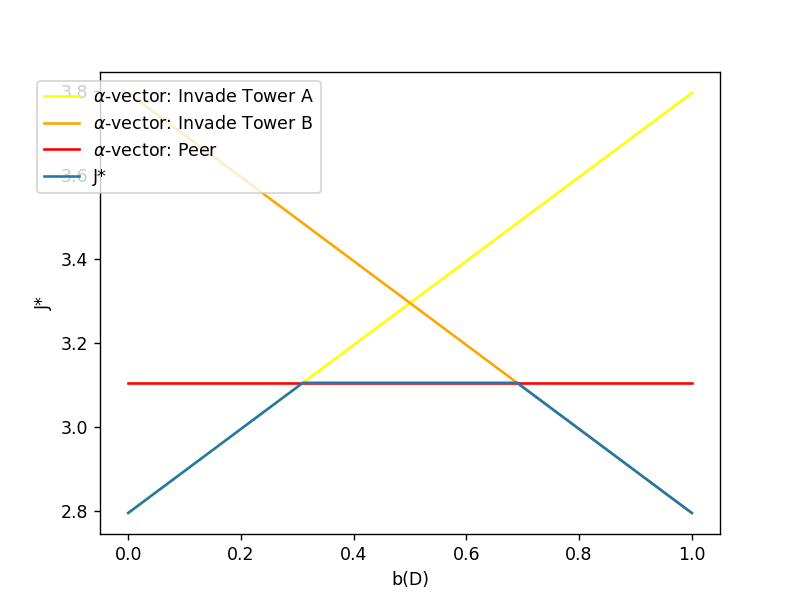

In [8]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib notebook
#a nossa ordem de açoes e peek, guessC, guessD

fig = plt.figure()
ax = fig.add_subplot(111)

a,=plt.plot([2.795, 3.795], color = "yellow", label=r'$ \alpha $-vector: Invade Tower A')
b,=plt.plot([3.795, 2.795], color = "orange", label=r'$ \alpha $-vector: Invade Tower B')
c,=plt.plot([3.105, 3.105], color = "red", label=r'$ \alpha $-vector: Peer')

x=[0,0.310,0.690,1]
y=[2.795,3.105,3.105,2.795]

line  = lines.Line2D(x,y,label="J*")
ax.add_line(line)

plt.legend(handles=[a,b,c,line],bbox_to_anchor=(0.356, 0.98), loc=1, borderaxespad=0.)

ax.set_xlabel('b(D)')
ax.set_ylabel('J*')

plt.show()
optimalCost=np.array([[3.105,2.795,3.795],[3.105,3.795,2.795]])

<IPython.core.display.Javascript object>


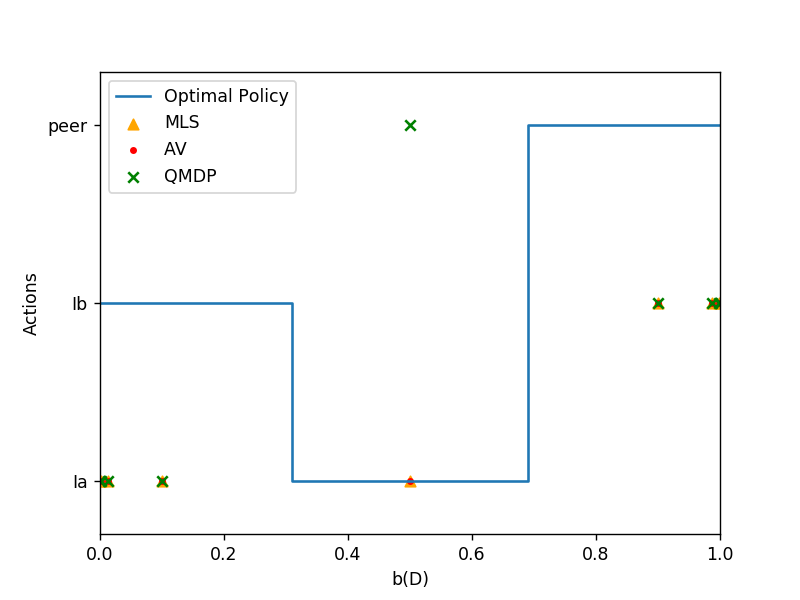

In [10]:
import matplotlib.patches as mpatches
%matplotlib notebook
#a nossa ordem de açoes e Inv A, Inv B, peer

fig = plt.figure()
ax = fig.add_subplot(111)

x=[0,0.310,0.310,0.690,0.690,1]
y=[1,1,0,0,2,2]

line  = lines.Line2D(x,y,label="Optimal Policy")
ax.add_line(line)

mls=[]
av=[]
qmdp=[]

for l in heuristics:
    mls.append(MDP.get('A').index(l[0]))
    av.append(MDP.get('A').index(l[1]))
    qmdp.append(MDP.get('A').index(l[2]))

x_mls = np.array(beliefs)[:,1].tolist()
y_mls = mls

x_av = np.array(beliefs)[:,1].tolist()
y_av = av

x_qmdp = np.array(beliefs)[:,1].tolist()
y_qmdp = qmdp

m=plt.scatter(x_mls, y_mls,color="orange",marker ="^",label="MLS")
a=plt.scatter(x_av, y_av,color="red",marker=".",label="AV")
q=plt.scatter(x_qmdp, y_qmdp,color="green",marker="x",label="QMDP")

plt.legend(handles=[line,m,a,q])

old_y=np.array([0, 1, 2])
new_y = np.array(["Ia", "Ib", "peer"])
plt.yticks(old_y,new_y)

ax.set_xlabel('b(D)')
ax.set_ylabel('Actions')

ax.set_ylim(min(y)-0.3, max(y)+0.3)
ax.set_xlim(min(x), max(x))

plt.show()